# House Price Prediction Using Ames Housing Dataset

## Step 1: Familiarize Yourself with the Dataset
The Ames Housing dataset includes 80 features describing aspects of residential properties in Ames, Iowa. The target variable is SalePrice.

## Step 2: Load and Explore the Data

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
data = pd.read_csv("AmesHousing.csv")  # Replace with your dataset path
print("Dataset Loaded Successfully!")

# Display basic dataset information
print("\nDataset Preview:")
display(data.head())

print("\nDataset Info:")
data.info()

print("\nSummary Statistics:")
display(data.describe())

Dataset Loaded Successfully!

Dataset Preview:


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17 

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


## Step 3: Clean the Data
    Drop unnecessary columns, if any.
    Identify columns with excessive missing values.

In [5]:
# Drop columns with more than 30% missing values
missing_threshold = 0.3
data = data.loc[:, data.isnull().mean() < missing_threshold]

# Verify remaining columns
print("\nColumns after dropping high missing values:")
print(data.columns)


Columns after dropping high missing values:
Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Type',
       'Garage Yr Blt', 'G

## Step 4: Handle Missing Values

In [6]:
# Fill missing numerical columns with the mean
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col].fillna(data[col].mean(), inplace=True)

# Fill missing categorical columns with the mode
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

print("Missing values handled successfully!")

Missing values handled successfully!


C:\Users\devid\AppData\Local\Temp\ipykernel_2284\3915454505.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
C:\Users\devid\AppData\Local\Temp\ipykernel_2284\3915454505.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

## Step 5: Convert Categorical Variables to Numerical

In [7]:
# Use one-hot encoding for categorical variables
data = pd.get_dummies(data, drop_first=True)

print("Categorical variables converted to numerical successfully!")

Categorical variables converted to numerical successfully!


## Step 6: Select Relevant Features

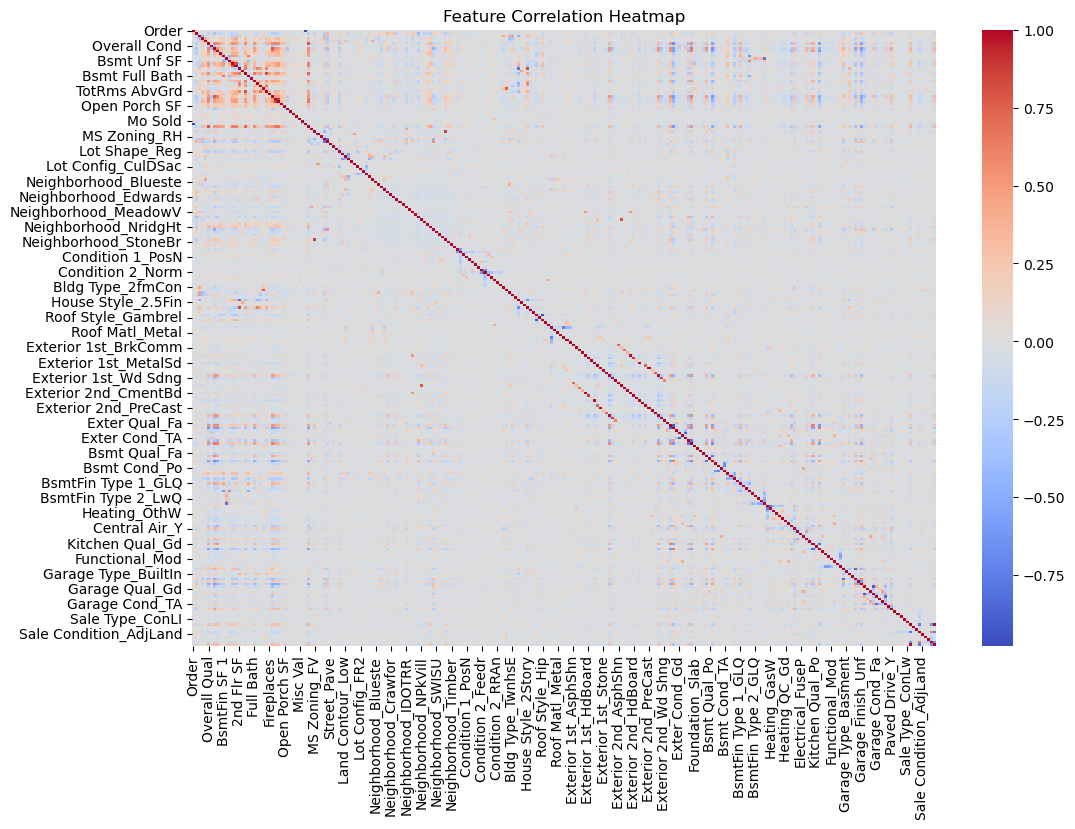

Number of Features Selected: 244


In [8]:
# Correlation heatmap to identify important features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Define the target variable and features
target = 'SalePrice'  # Replace with the actual column name
X = data.drop(columns=[target])
y = data[target]

print(f"Number of Features Selected: {X.shape[1]}")

## Step 7: Split the Data into Training and Testing Sets

In [9]:
# Import train_test_split for Splitting Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set Size: {X_train.shape}")
print(f"Testing Set Size: {X_test.shape}")

Training Set Size: (2344, 244)
Testing Set Size: (586, 244)


## Step 8: Choose and Train a Model

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Train Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Step 9: Evaluate Your Model's Performance

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R²": r2}

# Evaluate Linear Regression
linear_metrics = evaluate_model(linear_model, X_test, y_test)
print("\nLinear Regression Metrics:")
print(linear_metrics)

# Evaluate Random Forest
rf_metrics = evaluate_model(rf_model, X_test, y_test)
print("\nRandom Forest Metrics:")
print(rf_metrics)


Linear Regression Metrics:
{'MSE': 844790982.2793691, 'RMSE': 29065.28827105228, 'MAE': 16326.983634507424, 'R²': 0.894632250463675}

Random Forest Metrics:
{'MSE': 706205456.2419555, 'RMSE': 26574.526453766877, 'MAE': 15956.969641638227, 'R²': 0.9119175261154943}


## Step 10: Optimize Model Parameters

In [12]:
# Optimisizing Model Parameters for Random Forest
from sklearn.model_selection import GridSearchCV

# Grid search for Random Forest hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best Parameters for Random Forest:")
print(grid_search.best_params_)

Best Parameters for Random Forest:
{'max_depth': None, 'n_estimators': 200}


In [13]:
# Optimisizing Model Parameters for Linear Regression Model
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Ridge Regression - Hyperparameter Tuning
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Alpha is the regularization strength
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, ridge_params, scoring='neg_mean_squared_error', cv=5)
ridge_grid.fit(X_train, y_train)

print("Best Ridge Parameters:")
print(ridge_grid.best_params_)

# Lasso Regression - Hyperparameter Tuning
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso = Lasso()
lasso_grid = GridSearchCV(lasso, lasso_params, scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(X_train, y_train)

print("\nBest Lasso Parameters:")
print(lasso_grid.best_params_)

c:\Users\devid\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.46462e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\devid\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.49967e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\devid\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.37135e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\devid\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.49601e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\devid\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:21

Best Ridge Parameters:
{'alpha': 10}


c:\Users\devid\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.153e+11, tolerance: 1.132e+09
  model = cd_fast.enet_coordinate_descent(
c:\Users\devid\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.110e+11, tolerance: 1.082e+09
  model = cd_fast.enet_coordinate_descent(
c:\Users\devid\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.966e+11, toleranc


Best Lasso Parameters:
{'alpha': 100}


## Step 11: Visualizations & Insights
#### Scatter plot for actual vs. predicted prices:
    Random Forest
    Linear Regression Model

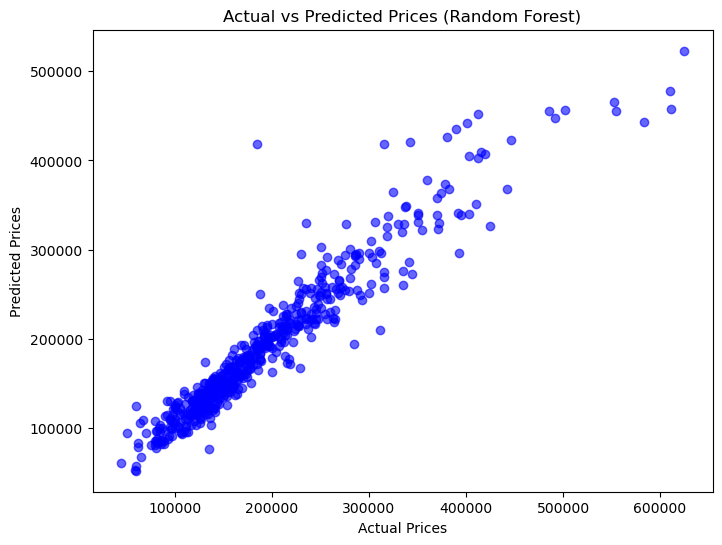

In [14]:
# Scatter plot of predictions vs actual prices (Random Forest)
y_pred_rf = rf_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Random Forest)")
plt.show()

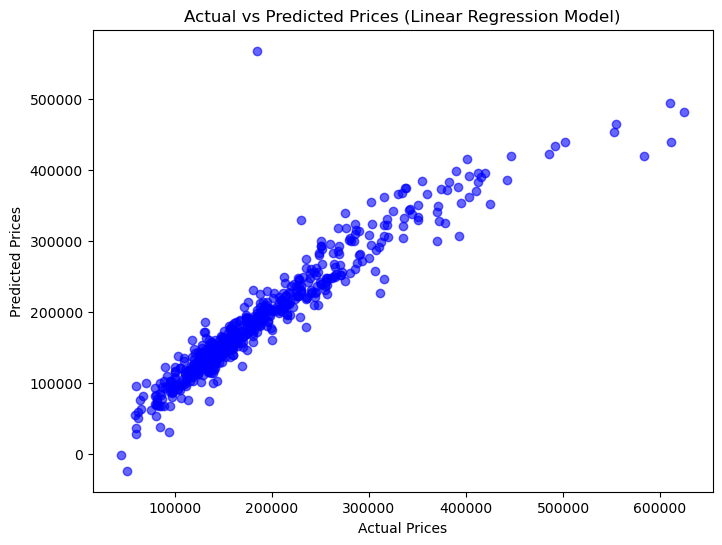

In [15]:
# Scatter plot of predictions vs actual prices (Linear Regression Model)
y_pred_linear_model = linear_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear_model, alpha=0.6, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Linear Regression Model)")
plt.show()

### Insights and Conclusions:

The Random Forest model performed better in terms of RMSE and R² compared to Linear Regression.
Key predictors of house prices include (identify from feature importance or correlation heatmap).